#Importing libraries

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


#2. Loading the datasheet

In [183]:
df=pd.read_csv("abalone.csv")

In [184]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [185]:
df.drop(columns=["Sex"],inplace = True)

In [186]:
df.tail()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


#3. Perform Below Visualization

##Univariate

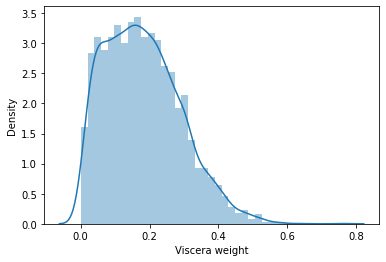

In [187]:
sns.distplot(df['Viscera weight'])

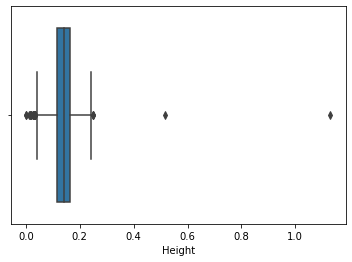

In [188]:
sns.boxplot(df["Height"])

##Bi-variate Analysis 

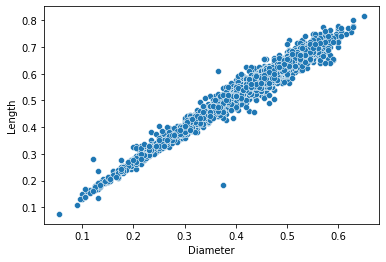

In [189]:
sns.scatterplot(df.Diameter,df.Length)

##Multivarient Analysis

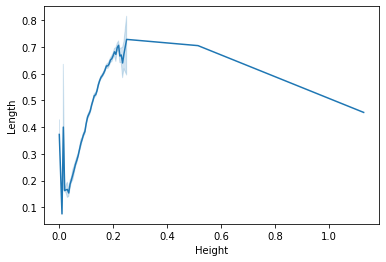

In [190]:
sns.lineplot(df['Height'],df['Length'])

#4.Perform descriptive statistics on the dataset

In [191]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [192]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [193]:
print("Mean:",df['Rings'].mean())
print("Median:",df['Rings'].median())
print("Mode:",df['Rings'].mode())
print("Standard Deviation",df['Rings'].std())
df.kurtosis()

Mean: 9.933684462532918
Median: 9.0
Mode: 0    9
dtype: int64
Standard Deviation 3.2241690320681284


Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Rings              2.330687
dtype: float64

#5.Checking for missing values and deal with them

In [194]:
df.isnull().any()

Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [195]:
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

#6.Find the Outliers and replace the outliers

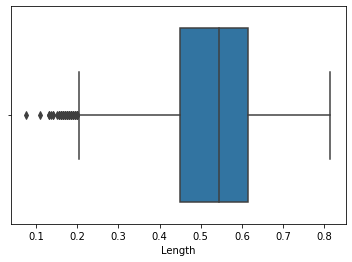

In [196]:
sns.boxplot(df.Length)

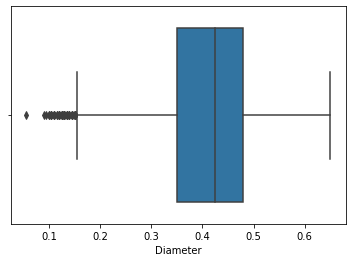

In [197]:
sns.boxplot(df.Diameter)


In [198]:
iq=df.quantile(q=[0.75,0.25])
iq


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0


In [199]:
iq.iloc[0]
iq.iloc[1]
IQR = iq.iloc[0] - iq.iloc[1]
upper_extrem = iq.iloc[0] + ( 1.5 * IQR)  
lower_extrem = iq.iloc[1] - ( 1.5 * IQR)   
upper_extrem

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64

In [200]:
lower_extrem

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
dtype: float64

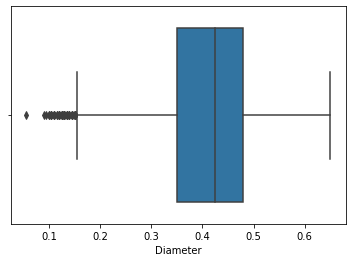

In [201]:
sns.boxplot(df.Diameter)

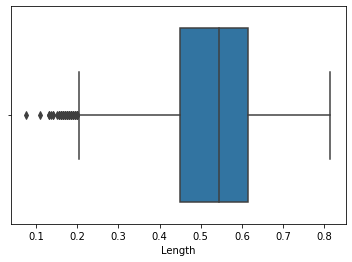

In [202]:
sns.boxplot(df.Length)

#7.CHECK CATEGORICAL COLUMNS AND PERFORM ENCODING

In [203]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.main=le.fit_transform(df.Rings)
df.main


array([14,  6,  8, ...,  8,  9, 11])

In [204]:
df.main=pd.get_dummies(df.Rings)
df.main

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4173,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4174,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [205]:
pd.get_dummies(df).tail()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


#8.Split the data into dependent and independent variables

In [206]:
X = df.iloc[:,0:3]
print(X)

      Length  Diameter  Height
0      0.455     0.365   0.095
1      0.350     0.265   0.090
2      0.530     0.420   0.135
3      0.440     0.365   0.125
4      0.330     0.255   0.080
...      ...       ...     ...
4172   0.565     0.450   0.165
4173   0.590     0.440   0.135
4174   0.600     0.475   0.205
4175   0.625     0.485   0.150
4176   0.710     0.555   0.195

[4177 rows x 3 columns]


In [207]:
Y = df.iloc[:14, 2].values
print(Y)

[0.095 0.09  0.135 0.125 0.08  0.095 0.15  0.125 0.125 0.15  0.14  0.11
 0.135 0.145]


#9.Scale the independent variables

In [208]:
from sklearn.preprocessing import StandardScaler

In [209]:
x = df[["Shell weight","Viscera weight"]]
scale = StandardScaler()
st_scale = scale.fit_transform(x)
st_scale

array([[-0.63821689, -0.72621157],
       [-1.21298732, -1.20522124],
       [-0.20713907, -0.35668983],
       ...,
       [ 0.49695471,  0.97541324],
       [ 0.41073914,  0.73362741],
       [ 1.84048058,  1.78744868]])

In [210]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
norm = min_max.fit_transform(x)
norm

array([[0.14798206, 0.1323239 ],
       [0.06826109, 0.06319947],
       [0.2077728 , 0.18564845],
       ...,
       [0.30543099, 0.37788018],
       [0.29347285, 0.34298881],
       [0.49177877, 0.49506254]])

#10.Split the data into training and testing

In [211]:
from sklearn.model_selection import train_test_split
y = df["Rings"]
x = df.drop(columns = ["Rings"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3341, 7), (836, 7), (3341,), (836,))

In [212]:
x_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
866,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1483,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
599,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
1702,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
670,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215
...,...,...,...,...,...,...,...
3093,0.520,0.430,0.150,0.7280,0.3020,0.1575,0.235
1651,0.595,0.435,0.150,0.9000,0.4175,0.1700,0.265
2897,0.545,0.430,0.150,0.7420,0.3525,0.1580,0.208
3953,0.465,0.355,0.120,0.5805,0.2550,0.0915,0.184


In [213]:
y_test

866      9
1483     8
599     16
1702     9
670     14
        ..
3093    11
1651     8
2897    10
3953     8
1830     7
Name: Rings, Length: 836, dtype: int64

In [214]:
x_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
4038,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210
1272,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140
3384,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045
3160,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035
3894,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215


In [215]:
x_test.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
866,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1483,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
599,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
1702,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
670,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [216]:
x_test.shape,x_train.shape

((836, 7), (3341, 7))

#11. Build Model

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [218]:
model = DecisionTreeClassifier()
R_model  = RandomForestClassifier()
log_reg = LogisticRegression()
nb = GaussianNB()

In [219]:
model.fit(x_train,y_train)
R_model.fit(x_train,y_train)
log_reg.fit(x_train,y_train)
nb.fit(x_train,y_train)


GaussianNB()

In [220]:
pred1 = model.predict(x_test)
pred2= log_reg.predict(x_test)
pred3=R_model.predict(x_test)
pred4 = nb.predict(x_test)
pred1,pred2,pred3,pred4

(array([ 9, 12, 17, 11, 14,  9,  8,  8,  8, 14, 12,  6,  8, 10,  7, 15, 10,
        15, 11,  7, 18, 10, 11,  9,  9,  6,  9,  7, 10,  8, 13, 11,  5,  8,
        10, 11,  6,  3,  7,  6, 10, 15,  9,  9, 10, 11,  8,  8, 15,  5,  5,
        16,  9,  3,  7, 13, 10, 13, 10,  9, 12, 16, 12,  7,  7, 11,  4,  7,
         8,  9,  9, 11, 10,  9,  6, 14, 16, 11, 10,  9, 14, 14, 10,  8,  6,
        11,  9,  8, 13, 14, 10, 10,  9, 11, 11,  9,  8,  9, 12,  7, 10,  8,
         9,  8,  9,  8, 12, 13,  9, 10, 10,  9, 10,  9,  8,  5,  9,  9, 10,
         9,  8, 10,  8, 11, 14, 11, 13,  8, 11, 16,  8,  9, 11,  4,  5,  7,
         9, 11,  5, 19,  8,  9, 11, 11, 11, 17, 12,  8,  9, 13,  8, 12,  9,
        10, 11,  9, 20,  5,  9,  5, 19,  6,  9, 11,  7, 14, 11, 12,  8,  9,
         8, 12,  9,  8,  7, 12,  9, 12, 10, 10, 14,  7,  6,  8,  7,  9,  8,
        10, 11,  5,  8, 10, 17, 14,  9,  9, 12, 21, 12,  9,  8, 12, 13,  9,
        10,  8, 11,  9,  8,  8,  6, 11, 12,  8,  9, 11, 10,  6, 13, 16, 17,
        12, 

#12.Train the model

In [221]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [222]:
tr_pred1=model.predict(x_train)
a=accuracy_score(y_train,tr_pred1)
print("Accuracy_score",a)

Accuracy_score 1.0


In [223]:
tr_pred2=R_model.predict(x_train)
a=accuracy_score(y_train,tr_pred2)
print("Accuracy_score",a)

Accuracy_score 1.0


In [224]:
tr_pred3=log_reg.predict(x_train)
a=accuracy_score(y_train,tr_pred3)
print("Accuracy_score",a)

Accuracy_score 0.2627955701885663


In [225]:
tr_pred4=nb.predict(x_train)
a=accuracy_score(y_train,tr_pred4)
print("Accuracy_score",a)

Accuracy_score 0.2478299910206525


#13.Test the model

In [226]:
tr_pred1=model.predict(x_test)
a=accuracy_score(y_test,tr_pred1)
print("Accuracy_score",a)

Accuracy_score 0.21889952153110048


In [227]:
tr_pred2=R_model.predict(x_test)
a=accuracy_score(y_test,tr_pred2)
print("Accuracy_score",a)

Accuracy_score 0.23923444976076555


In [228]:
tr_pred3=log_reg.predict(x_test)
a=accuracy_score(y_test,tr_pred3)
print("Accuracy_score",a)

Accuracy_score 0.2607655502392344


In [229]:
tr_pred4=nb.predict(x_test)
a=accuracy_score(y_test,tr_pred4)
print("Accuracy_score",a)

Accuracy_score 0.23564593301435408


#14. Measure the Performance for Metrics

In [230]:
print("Accuracy score :",accuracy_score(y_test,pred1))
print("Precision score :",precision_score(y_test,pred1,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred1))

Accuracy score : 0.21889952153110048
Precision score : 0.13431666275186974
Confustion matrix : [[ 2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  4  5  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  8 10  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9 13  8 11  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 15 21 17 12  4  4  5  1  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  3 12 31 28 10  6  5  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2 10 20 36 28 19  9  9  2  2  2  0  0  2  0  0  0  0  0]
 [ 0  0  0  2  1 18 31 30 27 10  6  5  2  4  1  0  1  1  0  0  0  0]
 [ 0  0  0  0  5  7 22 19 21  6  4  2  2  3  0  0  1  0  1  0  0  0]
 [ 0  0  0  1  0  3  6 10  7  7  5  3  1  3  1  0  1  2  0  0  1  0]
 [ 0  0  0  0  2  4  3  2  6  3  4  3  1  1  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  3  1  6  3  1  1  4  1  2  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  5  1  0  4  2  1  1  1  0  1  1  1  0  0  0]
 [ 0  0 

In [231]:
print("Accuracy score :",accuracy_score(y_test,pred2))
print("Precision score :",precision_score(y_test,pred2,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred2))

Accuracy score : 0.2607655502392344
Precision score : 0.07520696001237971
Confustion matrix : [[ 0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12 22 12  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 32 35 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  6 46 36  7  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 12 28 60 35  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8 20 50 42 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2 10 26 27 26  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6 15 17 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  4  9  8  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  9  9  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6 12  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  8  4  0  0  0  0  0  0  

In [232]:
print("Accuracy score :",accuracy_score(y_test,pred3))
print("Precision score :",precision_score(y_test,pred3,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred3))

Accuracy score : 0.23923444976076555
Precision score : 0.15663637973768768
Confustion matrix : [[ 1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  6  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  9 11  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 15 16  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 19 25 25  8  3  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 14 36 30 10  3  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8 37 39 29 20  4  2  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3 17 42 29 24 11  8  1  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  5 23 21 27  5  6  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  5  4 13 17  6  2  0  0  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  2  3  1 10  8  3  2  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  8  3  6  2  3  1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  8  2  1  7  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  2  2  0  1  1  1 

In [233]:
print("Accuracy score :",accuracy_score(y_test,pred4))
print("Precision score :",precision_score(y_test,pred4,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred4))

Accuracy score : 0.23564593301435408
Precision score : 0.08730741734741142
Confustion matrix : [[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6 13  9  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 18 11 12  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 14 22 26 14  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  6 23 26 34  2  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 10 17 17 50 19 25  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  1  6 12 16 38 18 45  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  2  2  4  9 20  7 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  6 14  5 19  0  0  0  0  0  0  0  0  1  0  0  0  1  1]
 [ 0  0  1  1  3  3  6  7 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  9  3  5  0  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  5  7  7  1  0  0  0  0 